In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


there are 4 files in the given dataset

In [2]:
filepath_2 = r'C:\Users\parim\Downloads\movie_data\movies.csv'
movies_df=pd.read_csv(filepath_2)

In [3]:
movies_df.shape

(9742, 3)

In [4]:
filepath_1 = r'C:\Users\parim\Downloads\movie_data\ratings.csv'
ratings_df=pd.read_csv(filepath_1)

In [5]:
ratings_df.shape

(100836, 4)

In [8]:
unique_user_ids = ratings_df['userId'].unique()
num_unique_user_ids = len(unique_user_ids)



In [9]:
num_unique_user_ids

610

In [15]:

ratings_count = ratings_df.groupby('movieId').size()
max_ratings_movieId = ratings_count.idxmax()
max_ratings_count = ratings_count.max()
movie_title = movies_df[movies_df['movieId'] == max_ratings_movieId]['title'].values[0]


In [16]:
movie_title

'Forrest Gump (1994)'

In [17]:
filepath_3=r'C:\Users\parim\Downloads\movie_data\tags.csv'
tags_df=pd.read_csv(filepath_3)

In [19]:
movie_id_matrix = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId'].values[0]
tags_for_movie = tags_df[tags_df['movieId'] == movie_id_matrix]
tags_list = tags_for_movie['tag'].tolist()



In [20]:
tags_list

['martial arts',
 'sci-fi',
 'alternate universe',
 'philosophy',
 'post apocalyptic']

In [22]:
movie_id_terminator = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]
ratings_for_movie = ratings_df[ratings_df['movieId'] == movie_id_terminator]
average_rating = ratings_for_movie['rating'].mean()


In [23]:
average_rating

3.970982142857143

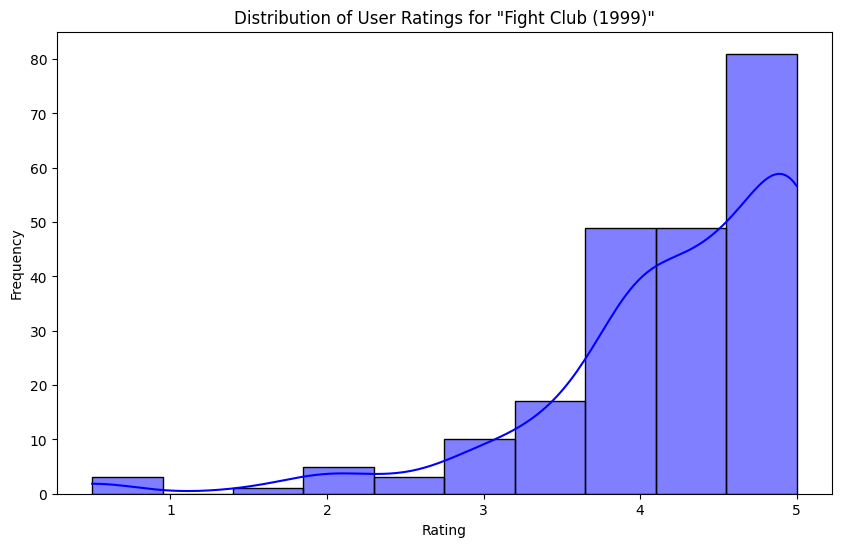

In [24]:
movie_id_fight_club = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]
ratings_for_movie = ratings_df[ratings_df['movieId'] == movie_id_fight_club]
plt.figure(figsize=(10, 6))
sns.histplot(ratings_for_movie['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [25]:

ratings_grouped = ratings_df.groupby('movieId').agg(rating_count=('rating', 'size'),rating_mean=('rating', 'mean')).reset_index()
movies_with_ratings = pd.merge(movies_df, ratings_grouped, on='movieId')
filtered_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]



In [27]:
# filtered_movies

In [30]:
most_popular_movie = filtered_movies.sort_values(by='rating_mean', ascending=False).iloc[0]

In [32]:
most_popular_movie

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

In [34]:
top_rated_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)
print(top_rated_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [38]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]
movie_title = third_most_popular_sci_fi['title']
number_of_ratings = third_most_popular_sci_fi['rating_count']

print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{movie_title}' with {number_of_ratings} ratings.")


The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 ratings.


In [40]:
filepath_4=r'C:\Users\parim\Downloads\movie_data\links.csv'
links_df=df=pd.read_csv(filepath_4)

In [56]:
import requests
from bs4 import BeautifulSoup

import pandas as pd


movie_dict = {'Ranking': [], 'Name': [], 'Year': [], 'Duration': [], 'Point': []}

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}

response = requests.get('https://m.imdb.com/chart/top/', headers=headers)

html_text = response.text

soup = BeautifulSoup(html_text, 'lxml')

movie_list = soup.find_all('li', class_='cli-parent')

for movie in movie_list:
    movie_dict['Ranking'].append(movie.find('h3', class_='ipc-title__text').text.split('.')[0])
    movie_dict['Name'].append(movie.find('h3', class_='ipc-title__text').text.split('.')[1].strip())
    movie_dict['Year'].append(movie.find_all('span', class_='cli-title-metadata-item')[0].text)
    movie_dict['Duration'].append(movie.find_all('span', class_='cli-title-metadata-item')[1].text)
    movie_dict['Point'].append(movie.find('span', class_='ratingGroup--imdb-rating').text[0:3])

df = pd.DataFrame(movie_dict)

In [57]:
# Convert 'Point' column to numeric values (remove trailing spaces and convert to float)
df['Point'] = df['Point'].str.strip().astype(float)

# Sort the DataFrame by 'Point' in descending order
df_sorted = df.sort_values(by='Point', ascending=False)

# Get the highest-rated movie
highest_rated_movie = df_sorted.iloc[0]
print(highest_rated_movie)



Ranking                            1
Name        The Shawshank Redemption
Year                            1994
Duration                      2h 22m
Point                            9.3
Name: 0, dtype: object


In [66]:
import requests
from bs4 import BeautifulSoup

import pandas as pd


movie_dict = {'Ranking': [], 'Name': [], 'Year': [], 'Duration': [], 'Point': []}

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}

response = requests.get('https://m.imdb.com/chart/top/', headers=headers)

html_text = response.text

soup = BeautifulSoup(html_text, 'lxml')

movie_list = soup.find_all('li', class_='cli-parent')

for movie in movie_list:
    movie_dict['Ranking'].append(movie.find('h3', class_='ipc-title__text').text.split('.')[0])
    movie_dict['Name'].append(movie.find('h3', class_='ipc-title__text').text.split('.')[1].strip())
    movie_dict['Year'].append(movie.find_all('span', class_='cli-title-metadata-item')[0].text)
    movie_dict['Duration'].append(movie.find_all('span', class_='cli-title-metadata-item')[1].text)
    movie_dict['Point'].append(movie.find('span', class_='ratingGroup--imdb-rating').text[0:3])

df = pd.DataFrame(movie_dict)

In [67]:
# Check if 'genres' column exists and contains 'Sci-Fi'
if 'genres' in df.columns:
    # Filter the DataFrame to include only Sci-Fi movies
    sci_fi_df = df[df['genres'].str.contains('Sci-Fi', case=False, na=False)]

    # Convert 'Point' column to numeric values (remove trailing spaces and convert to float)
    sci_fi_df['Point'] = pd.to_numeric(sci_fi_df['Point'].str.strip(), errors='coerce')

    # Sort the filtered DataFrame by 'Point' in descending order
    sci_fi_sorted = sci_fi_df.sort_values(by='Point', ascending=False)

    # Check if the filtered DataFrame is not empty and get the highest-rated Sci-Fi movie
    if not sci_fi_sorted.empty:
        highest_rated_sci_fi = sci_fi_sorted.iloc[0]
        print(highest_rated_sci_fi)
    else:
        print("No Sci-Fi movies found.")
else:
    df['Point'] = df['Point'].str.strip().astype(float)
    df_sorted = df.sort_values(by='Point', ascending=False)
    highest_rated_movie = df_sorted.iloc[10]
    print(highest_rated_movie)


Ranking            14
Name        Inception
Year             2010
Duration       2h 28m
Point             8.8
Name: 13, dtype: object
